**Алгоритмы на больших данных**

Общая структура следующая:

* простейшие алгоритмы на потоковых данных
* хэш функции
* развитие хэша через скетчи
* дерево отрезков на скетчах
* $\ell_0$ выборка через скетчи
* проверка связности распределенного графа через $\ell_0$ выборку
* подход к сложности задач на потоках через теорию коммуникации

Будем рассматривать ситуацию, когда нам дан достаточно большой поток данных $x_1,\dots,x_n$, $x_i \in {U}$.

Возможности детерменированных алгоритмов очень малы: даже **подсчет различных значений** в потоке требует памяти порядка $n \land |U|$.
Для решения этой проблемы есть следующая идея: предположим, что наше множество - это целые числа, в них лишь каждое второе делится на 2, каждое четвертое делится на 4 и так далее. Можно найти число кратное самой большой степени двойки и тем самым оценить размер $S$ (счетчиком в памяти $\log \log U$). Но в потоке мы можем взять лишь выборку, которая будет сильно зависеть от кратности (не получится взять равномерно уникальное подмножество размера q). Эту проблему решают с помощьюю хэш-функций $h: U \rightarrow \mathbb{N}_{\le 2^p}$ с сохранением свойства делимости будто это уникальное подмножество.

Уменьшать ошибку до сколь угодно маленькой величины можно независимыми запусками алгоритма и возвращать min/max/med.

**Частота записей** в потоке. 

Есть несколько моделей потоковых данных:
* кассовая (все частоты неотрицательные)
* турникетовая 
* строгая турникетовая (сумма частот всех элементов в любой момент времени неотрицательна)
* скользящее окно

Самым эффективным подходом к оценке частот записей является **count-min скетч**:
* создаем d массивов $a_j$ длины k
* частоты инкрементируют элемент $a_j[h_j(x_i)]$
* возвращаем в качестве оценки частоты $x$ величину $\min_j a_j[h_j(x)]$

Чтобы не ошибаться в частоте на множитель $\varepsilon$ с вероятностью порядка 1/2 достаточно массива порядка $1/\varepsilon$, а для уменьшения итоговой вероятности до уровня $\rho$ ещё надо взять $d = \log 1/\rho$. Эта структура данных оптимальна по памяти с точки зрения $\varepsilon$.


Для **интервальных запросов** удобно воспользоваться **диадическими интервалами**: 
система дерева-отрезка, для каждого элемента свой countmin скетч (с возвращением медианы в общем случае, если ключи отрицательные).

За время $\mathcal{O}(\log |U|)$ интервал внутри $|U|$ разбивается на $2\log |U|$ диадических.

* сколько ключей с частотой порядка $\varphi n$
* сколько ключей в диапазоне $[a,b]$
* какое значение соответствует $\varphi$-квантилю

При добавлении ключа мы добавляем его во все соответствующие уровни, а потом:
* выводим частоты рекурсивно
* суммируем частоты по разложению на диадические интервалы
* или строим бинарный поиск запросов по отрезку $[0,a_i]$ для нахождения квантили

Для **таблиц реляционной алгебры** в качестве оценки после эквиджойна можно взять $\min_j$ среди скалярных произведений строк в скетчах для подсчета частот и получить высокую (относительную) точность оценки.


В приложениях нередко хочется конструировать не равномерную выборку, а $\ell_0$.

Важным компонентом для этого является скетч для восстановления 1-разряженного вектора через подсчет величин:

* $l$ (сумма частот)
* $z$ (сумма частот, взвешенная номером объекта)
* $p$ (сумма мономов, взвешенных частотами)

После этого строят систему подпотоков с экспоненциально убывающей вероятностью попадания в них, в каждом из подпотоков хранится 1-разряженный скетч. Можно показать, что хотя бы в одном из уровней с большой вероятностью поток окажется 1-разряженным и мы его вернем. Если при этом мы не ошиблись, то можно считать, что мы выбрали равновероятно ключ из потока (у всех них был одинаковый шанс попасть на этот уровень). 


Алгоритм для $\ell_0$ выборки может быть применен при проверки связности распределенного графа (**Алгоритм Борувки**). Основной операцией в этой процедуре является поиск ребра с другой компоненты связности, реализуется это путем хранения для каждой вершины скетча из направлений рёбер, которые потом суммируются по компоненте связности для получения общего вектора частот. Если какое-то ребро вне компоненты связности, то там обязательно ненулевая компонента у скетча частот. Мы попытаемся случайно получить одно из этих рёбер.

К анализу алгоритмов на потоковых данных можно подойти через теорию **сложности коммуникации** - это когда имеются два игрока с неограниченными вычислительными ресурсами, и они хотят посчитать распределенно некоторую функцию от двух аргументов, при этом передача информации производится лишь в одну сторону (и её объем минимизируется).

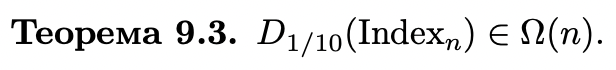
Эта теорема доказывается через принцип Яо и расстояния Хэмминга на булевых векторах.
Через этот результат показывается субоптимальность алгоритма Борувки для проверки связности графа.